### 1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [15]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [16]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


### 2. Load the Wine Quality dataset and explore its dimensions.

In [17]:
df=pd.read_csv("wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [18]:
df.shape

(1599, 12)

There are 1599 rows and 12 columns

In [19]:
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

### 3. Check for null values, identify categorical variables, and encode them.

In [20]:
## Checking null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### There ar no null values

In [21]:
## Separating numerical and categorical values
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

In [22]:
#Encoding the target variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['quality'] = encoder.fit_transform(df['quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### 4. Separate the features and target variables from the dataset.

In [23]:
features = df.drop('quality',axis=1)
target = df['quality']

In [24]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [25]:
target.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

### 6. Scale the dataset using an appropriate scaling technique.

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Apply StandardScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
features = pd.DataFrame(features)

# Concatenate the scaled features with the target variable
scaled_data_with_target = pd.concat([features, target], axis=1)

print("Scaled data (MinMaxScaler):")
print(scaled_data_with_target)

Scaled data (MinMaxScaler):
             0         1     2         3         4         5         6  \
0     0.247788  0.397260  0.00  0.068493  0.106845  0.140845  0.098940   
1     0.283186  0.520548  0.00  0.116438  0.143573  0.338028  0.215548   
2     0.283186  0.438356  0.04  0.095890  0.133556  0.197183  0.169611   
3     0.584071  0.109589  0.56  0.068493  0.105175  0.225352  0.190813   
4     0.247788  0.397260  0.00  0.068493  0.106845  0.140845  0.098940   
...        ...       ...   ...       ...       ...       ...       ...   
1594  0.141593  0.328767  0.08  0.075342  0.130217  0.436620  0.134276   
1595  0.115044  0.294521  0.10  0.089041  0.083472  0.535211  0.159011   
1596  0.150442  0.267123  0.13  0.095890  0.106845  0.394366  0.120141   
1597  0.115044  0.359589  0.12  0.075342  0.105175  0.436620  0.134276   
1598  0.123894  0.130137  0.47  0.184932  0.091820  0.239437  0.127208   

             7         8         9        10  quality  
0     0.567548  0.606299  0

### 5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [27]:
from sklearn.model_selection import train_test_split

features_train_temp, features_test, target_train_temp, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

features_train, features_val, target_train, target_val = train_test_split(
    features_train_temp, target_train_temp, test_size=0.25, random_state=42
)
print("Training set shape:", features_train.shape)
print("Validation set shape:", features_val.shape)
print("Test set shape:", features_test.shape)

Training set shape: (959, 11)
Validation set shape: (320, 11)
Test set shape: (320, 11)


In [28]:
features_test.shape

(320, 11)

In [29]:
features_train.shape

(959, 11)

### 7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [150]:
LAYERS = [tf.keras.layers.Dense(units=300, activation="relu", name="hiddenLayer1",input_dim=11),
          tf.keras.layers.Dense(units=100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(units=1, activation='sigmoid', name="outputLayer")]

### 8. Create a Sequential model in Keras and add the previously designed layers to it.

In [151]:
model_clf= tf.keras.models.Sequential(LAYERS)

In [152]:
model_clf.layers

### 9. Print the summary of the model architecture.

In [153]:
model_clf.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenLayer1 (Dense)        (None, 300)               3600      
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 33,801
Trainable params: 33,801
Non-trainable params: 0
_________________________________________________________________


### 10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [154]:
LOSS_FUNCTION = "binary_crossentropy" 
OPTIMIZER = "SGD" 
METRICS = ["accuracy"]

### 11. Compile the model with the specified loss function, optimizer, and metrics.

In [155]:
model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

### 12. Fit the model to the training data using appropriate batch size and number of epochs.

In [156]:
# Fit the model to the training data with validation
batch_size = 1
epochs = 10
history=model_clf.fit(features_train, target_train, batch_size=batch_size, epochs=epochs, 
          validation_data=(features_val, target_val))

Epoch 1/10
959/959 [==============================] - 2s 2ms/step - loss: 0.6602 - accuracy: 0.6413 - val_loss: 0.6484 - val_accuracy: 0.6375
Epoch 2/10
959/959 [==============================] - 2s 2ms/step - loss: 0.5982 - accuracy: 0.6861 - val_loss: 0.5873 - val_accuracy: 0.7219
Epoch 3/10
959/959 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7174 - val_loss: 0.5613 - val_accuracy: 0.7312
Epoch 4/10
959/959 [==============================] - 2s 2ms/step - loss: 0.5429 - accuracy: 0.7278 - val_loss: 0.5597 - val_accuracy: 0.7469
Epoch 5/10
959/959 [==============================] - 2s 2ms/step - loss: 0.5366 - accuracy: 0.7195 - val_loss: 0.5502 - val_accuracy: 0.7531
Epoch 6/10
959/959 [==============================] - 2s 2ms/step - loss: 0.5366 - accuracy: 0.7101 - val_loss: 0.5728 - val_accuracy: 0.6875
Epoch 7/10
959/959 [==============================] - 2s 2ms/step - loss: 0.5243 - accuracy: 0.7341 - val_loss: 0.5419 - val_accuracy: 0.7563
Epoch 

### 13. Obtain the model's parameters (weights and biases).

In [120]:
for layer in model.layers:
    print("Layer name:", layer.name)
    print("Weights shape:", layer.get_weights()[0].shape)
    print("Biases shape:", layer.get_weights()[1].shape)
    print("")

Layer name: hiddenLayer1
Weights shape: (11, 200)
Biases shape: (200,)

Layer name: hiddenLayer2
Weights shape: (200, 100)
Biases shape: (100,)

Layer name: outputLayer
Weights shape: (100, 2)
Biases shape: (2,)



### 14. Store the model's training history as a Pandas DataFrame.

In [157]:
data=pd.DataFrame(history.history)
data

,loss,accuracy,val_loss,val_accuracy
0,0.660213,0.641293,0.648377,0.637500
1,0.598205,0.686131,0.587251,0.721875
2,0.552780,0.717414,0.561253,0.731250
3,0.542940,0.727841,0.559716,0.746875
4,0.536603,0.719499,0.550247,0.753125
5,0.536579,0.710115,0.572777,0.687500
6,0.524276,0.734098,0.541902,0.756250
7,0.524526,0.736184,0.670957,0.640625
8,0.524064,0.729927,0.558046,0.709375
9,0.530382,0.722628,0.536609,0.750000


### 15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

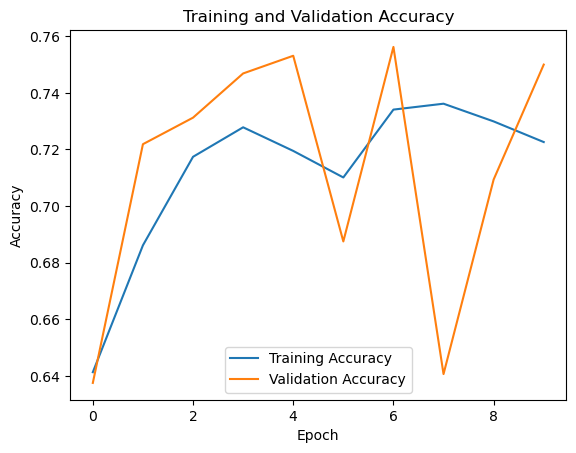

In [158]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

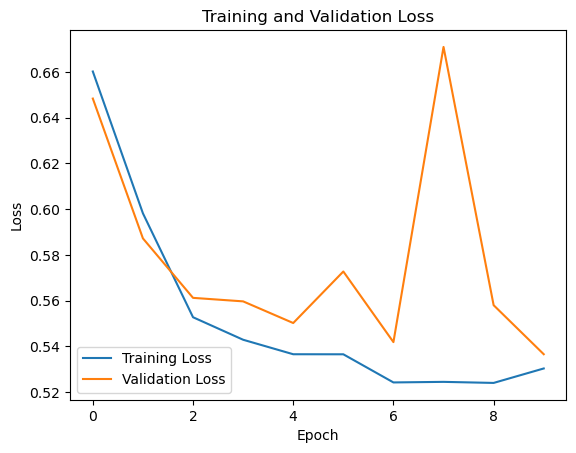

In [159]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

### 16.Evaluate the model's performance using the test dataset and report relevant metrics.

In [161]:
# Evaluate the model on the test dataset
loss, accuracy = model_clf.evaluate(features_test, target_test)

# Report the metrics
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7219
Test Loss: 0.5207254886627197
Test Accuracy: 0.721875011920929
